In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🌡️ Temperature Prediction with XGBoost (Before Pettit Test)

In [ ]:
df = pd.read_csv("df_model_before_Pettit.csv")
df

,Barometer - mm Hg,Hum - %,Wind Speed - m/s,Rain - mm,Heat Index - °C,Temp - °C,Season,Day_Night,Wind_Dir_sin,Wind_Dir_cos,Wind_Direction
0,769.0,49.0,0.0,0.0,24.2,24.3,0,0,NaN,NaN,NaN
1,768.9,37.0,1.3,0.0,29.2,29.4,0,0,1.000000e+00,6.123234e-17,18.0
2,768.5,33.0,1.8,0.0,29.7,30.4,0,0,9.238795e-01,-3.826834e-01,4.5
3,768.1,33.0,1.3,0.0,30.2,31.1,0,0,1.000000e+00,6.123234e-17,18.0
4,767.6,30.0,1.8,0.0,30.2,31.4,0,0,1.000000e+00,6.123234e-17,18.0
...,...,...,...,...,...,...,...,...,...,...,...
65906,755.5,86.0,1.8,0.0,27.5,25.4,1,0,1.224647e-16,-1.000000e+00,0.0
65907,756.0,86.0,2.2,0.0,27.4,25.3,1,1,9.238795e-01,3.826834e-01,31.5
65908,756.5,86.0,1.8,0.0,27.4,25.3,1,1,7.071068e-01,7.071068e-01,9.0
65909,756.9,82.0,2.7,0.0,28.6,26.1,1,1,1.224647e-16,-1.000000e+00,0.0


In [ ]:
df.columns

Index(['Barometer - mm Hg', 'Hum - %', 'Wind Speed - m/s', 'Rain - mm',
       'Heat Index - °C', 'Temp - °C', 'Season', 'Day_Night', 'Wind_Dir_sin',
       'Wind_Dir_cos', 'Wind_Direction'],
      dtype='object')

In [ ]:
df.drop(["Day_Night","Wind_Direction"],axis=1,inplace=True)

In [ ]:
X = df.drop(["Temp - °C"],axis=1)
y = df["Temp - °C"]

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import time

## 🦾 Finding the best n for XGBoost by elbow method

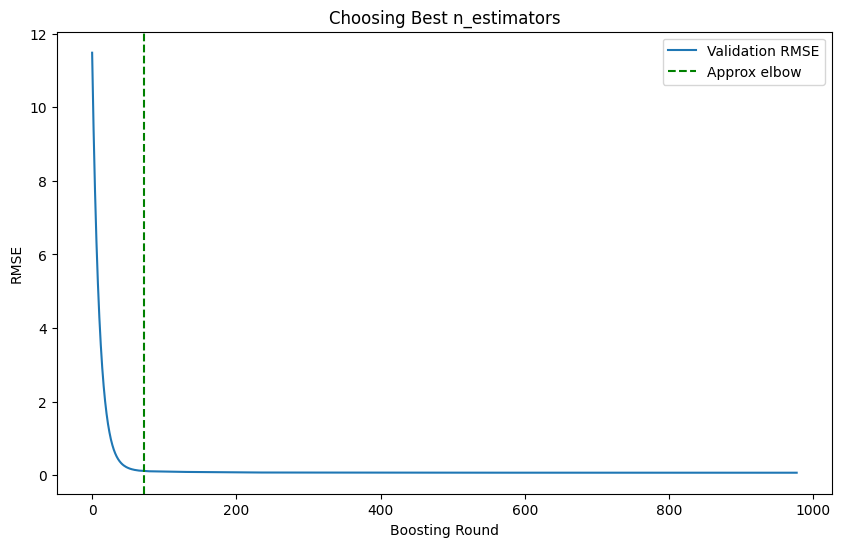

Approx elbow (where improvement slows): 72


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

X_train1, X_val1, y_train1, y_val1 = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(
    n_estimators=5000,
    learning_rate=0.05,
    objective='reg:squarederror',
    eval_metric='rmse',
    early_stopping_rounds=50
)

model.fit(
    X_train1, y_train1,
    eval_set=[(X_train1, y_train1), (X_val1, y_val1)],
    verbose=False
)

results = model.evals_result()
val_rmse = np.array(results['validation_1']['rmse'])
val_mse = val_rmse**2

improvement = -np.diff(val_mse)
elbow = np.argmax(improvement < 0.001) + 1

plt.figure(figsize=(10,6))
plt.plot(val_mse, label='Validation RMSE')
plt.axvline(elbow, color='green', linestyle='--', label='Approx elbow')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.title('Choosing Best n_estimators')
plt.legend()
plt.show()


print("Approx elbow (where improvement slows):", elbow)



## ⛅ Model and Evaluation Before Pettit Test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators = elbow
model2 = XGBRegressor(objective='reg:squarederror', n_estimators=n_estimators)

model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE :' ,round(mse, 4))
print('R² :' ,round(r2, 4))


MSE : 0.0755
R² : 0.994


In [ ]:
comparison_df = pd.DataFrame({
    'Real': y_test.values.flatten(),
    'Predicted': y_pred.flatten()
})
comparison_df

,Real,Predicted
0,26.3,26.325167
1,18.4,18.423956
2,25.2,25.069515
3,19.4,19.399155
4,26.1,26.153778
...,...,...
13178,25.7,25.808584
13179,24.6,24.548494
13180,25.1,25.037792
13181,24.5,24.549513


# ↪ XGBoost Regression Model After Pettit

In [ ]:
df2 = pd.read_csv("df_model_after_Pettit.csv")
df2

,Barometer - mm Hg,Hum - %,Wind Speed - m/s,Rain - mm,Heat Index - °C,Temp - °C,Season,Day_Night,Wind_Dir_sin,Wind_Dir_cos,Wind_Direction
0,757.9,60.0,4.9,0.0,3.335770,26.4,0,1,0.000000e+00,1.000000,0.0
1,757.4,60.0,4.9,0.0,3.342862,26.6,0,1,0.000000e+00,1.000000,0.0
2,757.7,64.0,3.1,0.0,3.349904,26.5,0,1,0.000000e+00,1.000000,0.0
3,757.8,66.0,4.0,0.0,3.310543,25.6,0,1,0.000000e+00,1.000000,0.0
4,758.1,64.0,3.6,0.0,3.299534,25.3,0,1,0.000000e+00,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
33236,755.5,86.0,1.8,0.0,3.349904,25.4,1,0,1.224647e-16,-1.000000,0.0
33237,756.0,86.0,2.2,0.0,3.346389,25.3,1,1,9.238795e-01,0.382683,31.5
33238,756.5,86.0,1.8,0.0,3.346389,25.3,1,1,7.071068e-01,0.707107,9.0
33239,756.9,82.0,2.7,0.0,3.387774,26.1,1,1,1.224647e-16,-1.000000,0.0


## 💡 Finding the best n for XGBoost After Pettit Test

In [ ]:
df2.drop(["Day_Night","Wind_Direction"],axis=1,inplace=True)

In [ ]:
X2 = df2.drop(["Temp - °C"],axis=1)
y2 = df2["Temp - °C"]

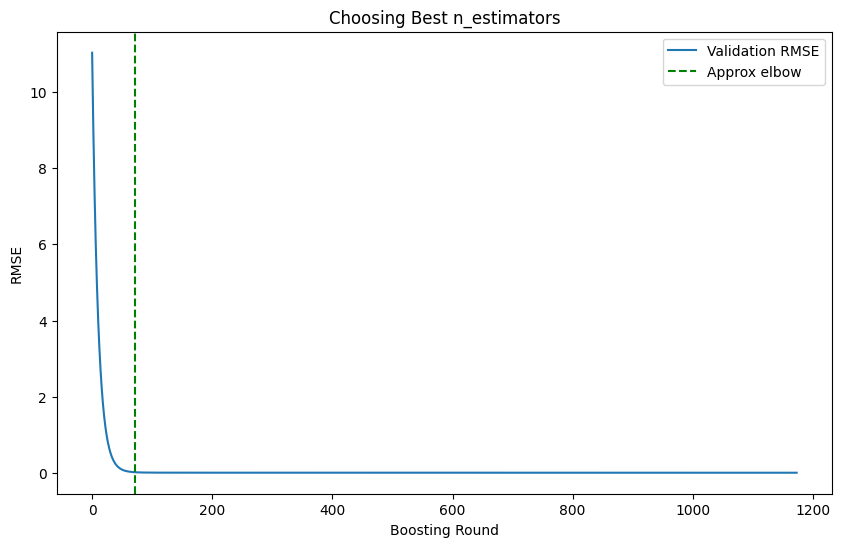

Approx elbow (where improvement slows): 72


In [ ]:

X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

model3 = XGBRegressor(
    n_estimators=5000,
    learning_rate=0.05,
    objective='reg:squarederror',
    eval_metric='rmse',
    early_stopping_rounds=50
)

model3.fit(
    X_train_2, y_train_2,
    eval_set=[(X_train_2, y_train_2), (X_val_2, y_val_2)],
    verbose=False
)

results2 = model3.evals_result()
val_rmse2 = np.array(results2['validation_1']['rmse'])
val_mse2 = val_rmse2**2
improvement2 = -np.diff(val_mse2)
elbow2 = np.argmax(improvement2 < 0.001) + 1

plt.figure(figsize=(10,6))
plt.plot(val_mse2, label='Validation RMSE')
plt.axvline(elbow2, color='green', linestyle='--', label='Approx elbow')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.title('Choosing Best n_estimators')
plt.legend()
plt.show()


print("Approx elbow (where improvement slows):", elbow2)



## 🔮 Evaluation After Pettit Test

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

n_estimators2 = elbow2
model4 = XGBRegressor(objective='reg:squarederror', n_estimators=n_estimators2)

model4.fit(X_train2, y_train2)
y_pred2 = model4.predict(X_test2)

mse2 = mean_squared_error(y_test2, y_pred2)
r_2 = r2_score(y_test2, y_pred2)

print('MSE :' ,round(mse2, 4))
print('R² :' ,round(r_2, 4))


MSE : 0.0116
R² : 0.999


In [ ]:
comparison_df2 = pd.DataFrame({
    'Real': y_test2.values.flatten(),
    'Predicted': y_pred2.flatten()
})
comparison_df2

,Real,Predicted
0,22.8,22.826170
1,32.9,32.762424
2,34.8,34.843540
3,29.2,29.141232
4,23.8,23.830151
...,...,...
6644,31.2,31.141340
6645,23.9,23.905424
6646,22.2,22.083759
6647,29.8,29.780966
